## Preparation

In [1]:
!wget https://www.tbi.univie.ac.at/RNA/download/ubuntu/ubuntu_18_04/viennarna_2.4.15-1_amd64.deb
!apt-get install ./viennarna_2.4.15-1_amd64.deb -y
!git clone https://github.com/DasLab/arnie

!/opt/conda/bin/python3.7 -m pip install --upgrade pip
!git clone https://www.github.com/DasLab/draw_rna draw_rna_pkg
!cd draw_rna_pkg && python setup.py install

--2020-09-19 12:06:55--  https://www.tbi.univie.ac.at/RNA/download/ubuntu/ubuntu_18_04/viennarna_2.4.15-1_amd64.deb
Resolving www.tbi.univie.ac.at (www.tbi.univie.ac.at)... 131.130.44.61
Connecting to www.tbi.univie.ac.at (www.tbi.univie.ac.at)|131.130.44.61|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3240220 (3.1M) [application/x-debian-package]
Saving to: ‘viennarna_2.4.15-1_amd64.deb’

viennarna_2.4.15-1_ 100%[===================>]   3.09M  1.62MB/s    in 1.9s    

2020-09-19 12:06:59 (1.62 MB/s) - ‘viennarna_2.4.15-1_amd64.deb’ saved [3240220/3240220]




Note, selecting 'viennarna' instead of './viennarna_2.4.15-1_amd64.deb'
The following additional packages will be installed:
  libgsl23 libgslcblas0
Suggested packages:
  gsl-ref-psdoc | gsl-doc-pdf | gsl-doc-info | gsl-ref-html
Recommended packages:
  python-rna perl-rna
The following NEW packages will be installed:
  libgsl23 libgslcblas0 viennarna
0 upgraded, 3 newly installed, 0 to remove and 76 n

## Setting

In [2]:
import os
import sys

!echo "vienna_2: /usr/bin" > arnie.conf
!echo "TMP: /kaggle/working/tmp" >> arnie.conf
!mkdir -p /kaggle/working/tmp
os.environ["ARNIEFILE"] = f"/kaggle/working/arnie.conf"
sys.path.append('/kaggle/working/draw_rna_pkg/')
sys.path.append('/kaggle/working/draw_rna_pkg/ipynb/')

## Following is based on https://github.com/DasLab/arnie/blob/master/notebooks/start_here.ipynb

In [3]:
%load_ext autoreload
%autoreload 2
%pylab inline

import seaborn as sns
sns.set_context('poster')
sns.set_style('white')
import numpy as np
from arnie.pfunc import pfunc
from arnie.free_energy import free_energy
from arnie.bpps import bpps
from arnie.mfe import mfe
import arnie.utils as utils
from decimal import Decimal
import pandas as pd
from draw import draw_struct
from arnie.mea.mea import MEA

Populating the interactive namespace from numpy and matplotlib


In [4]:
train = pd.read_json('../input/stanford-covid-vaccine/train.json', lines=True)
sequence = train.sequence.values[0]
sequence

'GGAAAAGCUCUAAUAACAGGAGACUAGGACUACGUAUUUCUAGGUAACUGGAAUAACCCAUACCAGCAGUUAGAGUUCGCUCUAACAAAAGAAACAACAACAACAAC'

In [5]:
mfe_structure = mfe(sequence)
print(mfe_structure)

.....((((((.......)))).)).((.....((..((((((....))))))..)).....))....(((((((....))))))).....................


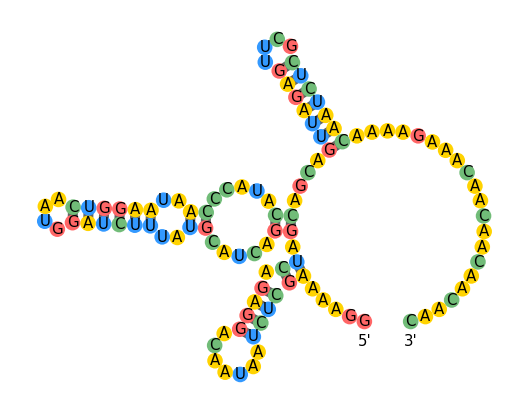

In [6]:
draw_struct(sequence, mfe_structure)

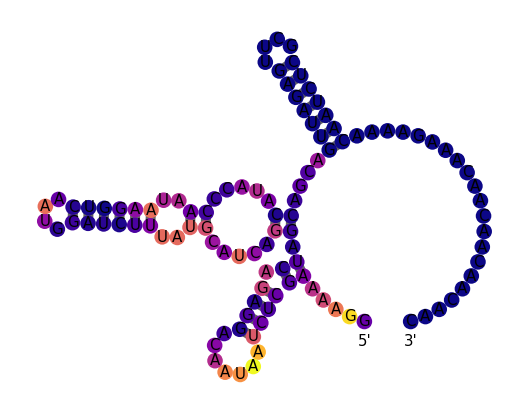

In [7]:
reactivity = np.zeros(len(sequence))
reactivity68 = train.reactivity.values[0]
reactivity[:len(reactivity68)] = reactivity68
draw_struct(sequence, mfe_structure, c = reactivity, cmap='plasma')
# yellow = higher reactivity, blue = lower reactivity

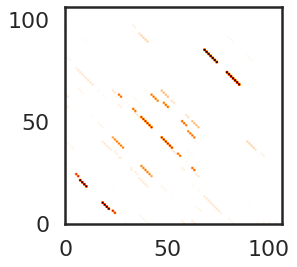

In [8]:
bp_matrix = bpps(sequence)
plt.imshow(bp_matrix, origin='lower left', cmap='gist_heat_r')

Text(0, 0.5, 'p(unpaired)')

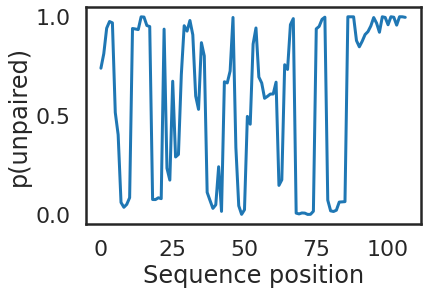

In [9]:
p_unp_vec = 1 - np.sum(bp_matrix, axis=0)
plot(p_unp_vec)
xlabel('Sequence position')
ylabel('p(unpaired)')

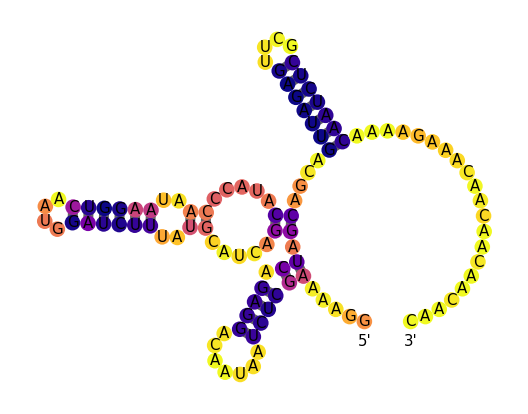

In [10]:
draw_struct(sequence, mfe_structure, c = p_unp_vec, cmap='plasma')
# yellow = higher unpaired probability, blue = higher paired probability

In [11]:
for i in range(10):
    print(i)
    sequence = train.sequence.values[i]
    ground_truth_struct = train.structure.values[i]
    bp_matrix = bpps(sequence)
    
    for log_gamma in range(-10,10):
        mea_mdl = MEA(bp_matrix,gamma=10**log_gamma)
        [exp_sen, exp_ppv, exp_mcc, exp_fscore] = mea_mdl.score_expected()
        [sen, ppv, mcc, fscore] = mea_mdl.score_ground_truth(ground_truth_struct)

        print("%d %d %s %.2f %.2f" % (ground_truth_struct == mea_mdl.structure, log_gamma, mea_mdl.structure, exp_mcc, mcc))
        if log_gamma == 0:
            print("    %s" % ground_truth_struct)
            print("    %s" % mfe(sequence))

0
0 -10 ........................................................................................................... 0.00 0.00
0 -9 ........................................................................................................... 0.00 0.00
0 -8 ........................................................................................................... 0.00 0.00
0 -7 ........................................................................................................... 0.00 0.00
0 -6 ........................................................................................................... 0.00 0.00
0 -5 ........................................................................................................... 0.00 0.00
0 -4 ........................................................................................................... 0.00 0.00
0 -3 ........................................................................................................... 0.00 0.00
0 -2 ........